In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlip.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_store = pd.read_csv('data/store.csv')

In [3]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df = df_train.merge(df_store, how='left', left_on=df_train.Store, right_on=df_store.Store)
df.drop(['key_0', 'Store_y'], axis=1, inplace=True)
df = df.rename(columns={'Store_x':'Store'})
df.shape

(1017209, 18)

In [5]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
cols = df.columns.tolist()
cols = [col.lower() for col in cols]
df.columns = cols

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   store                      1017209 non-null  int64  
 1   dayofweek                  1017209 non-null  int64  
 2   date                       1017209 non-null  object 
 3   sales                      1017209 non-null  int64  
 4   customers                  1017209 non-null  int64  
 5   open                       1017209 non-null  int64  
 6   promo                      1017209 non-null  int64  
 7   stateholiday               1017209 non-null  object 
 8   schoolholiday              1017209 non-null  int64  
 9   storetype                  1017209 non-null  object 
 10  assortment                 1017209 non-null  object 
 11  competitiondistance        1014567 non-null  float64
 12  competitionopensincemonth  693861 non-null   float64
 13  competitiono

In [8]:
df = df.assign(
    timestamp = lambda x: pd.to_datetime(x['date']),
    year = lambda x: x['timestamp'].dt.year,
    month = lambda x: x['timestamp'].dt.month,
    day = lambda x: x['timestamp'].dt.day,
    dayofyear = lambda x: x['timestamp'].dt.dayofyear
)

In [9]:
df.head()

,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday,storetype,...,competitionopensinceyear,promo2,promo2sinceweek,promo2sinceyear,promointerval,timestamp,year,month,day,dayofyear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015-07-31,2015,7,31,212
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-31,2015,7,31,212
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015-07-31,2015,7,31,212
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015-07-31,2015,7,31,212
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015-07-31,2015,7,31,212


In [10]:
df['stateholiday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [11]:
df.stateholiday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: stateholiday, dtype: int64

In [12]:
df['stateholiday'].replace({0:'0'}, inplace=True)

In [13]:
#for i, day in enumerate(df.dayofyear):
#    if day == 359 or day == 358:
#        df.stateholiday.iloc[i] = "c"
#    else:
#        pass
        
        

In [14]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
dayofweek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
schoolholiday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
competitiondistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
competitionopensincemonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
competitionopensinceyear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [15]:
df.isnull().sum()

store                             0
dayofweek                         0
date                              0
sales                             0
customers                         0
open                              0
promo                             0
stateholiday                      0
schoolholiday                     0
storetype                         0
assortment                        0
competitiondistance            2642
competitionopensincemonth    323348
competitionopensinceyear     323348
promo2                            0
promo2sinceweek              508031
promo2sinceyear              508031
promointerval                508031
timestamp                         0
year                              0
month                             0
day                               0
dayofyear                         0
dtype: int64

In [16]:
df_store[pd.isnull(df_store.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [17]:
# fill NaN with a median value
df['competitiondistance'].fillna(df['competitiondistance'].median(), inplace = True)
df['competitiondistance'].isnull().sum()

0

In [18]:
tmp = df_store[pd.isnull(df_store.CompetitionOpenSinceYear  )]
tmp[tmp.CompetitionDistance != 0].shape

(354, 10)

In [19]:
tmp = df[pd.isnull(df.promo2sinceweek)]
tmp[tmp.promo2 != 0].shape

(0, 23)

In [20]:
# replace NA's by 0
df.fillna(0, inplace = True)

In [21]:
df.groupby('storetype')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
storetype,,,,,,,,
a,551627.0,5738.179710,3964.028134,0.0,3508.0,5618.0,7860.00,41551.0
b,15830.0,10058.837334,5280.525506,0.0,6227.0,9025.5,13082.75,38722.0
c,136840.0,5723.629246,3721.700886,0.0,3789.0,5766.0,7849.00,31448.0
d,312912.0,5641.819243,3473.393781,0.0,3986.0,5826.0,7691.00,38037.0


In [22]:
df.groupby('storetype')['customers', 'sales'].sum()

,customers,sales
storetype,,
a,363541434,3165334859
b,31465621,159231395
c,92129705,783221426
d,156904995,1765392943


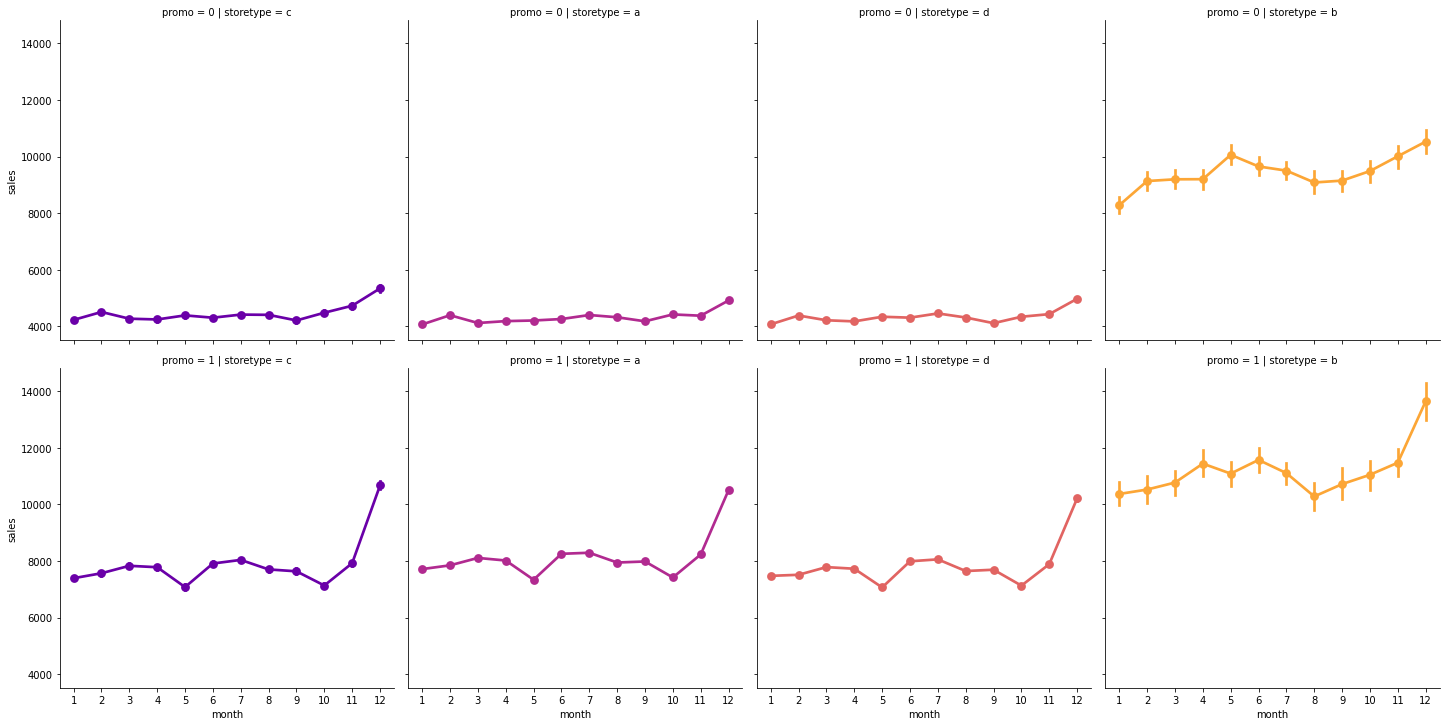

In [23]:
# sales trends
sns.factorplot(data = df, x = 'month', y = "sales", 
               col = 'storetype',
               palette = 'plasma',
               hue = 'storetype',
               row = 'promo', 
               ) 

Storetype B has the highest sales numbers, with the largest variance. All storetypes show increased sales numbers towards christmas. 

Stores which have run a promo, show higher sales. But storetypes a,c and d show a dip towards easter, if they have run a promo, which is not the case for stores without a promo.

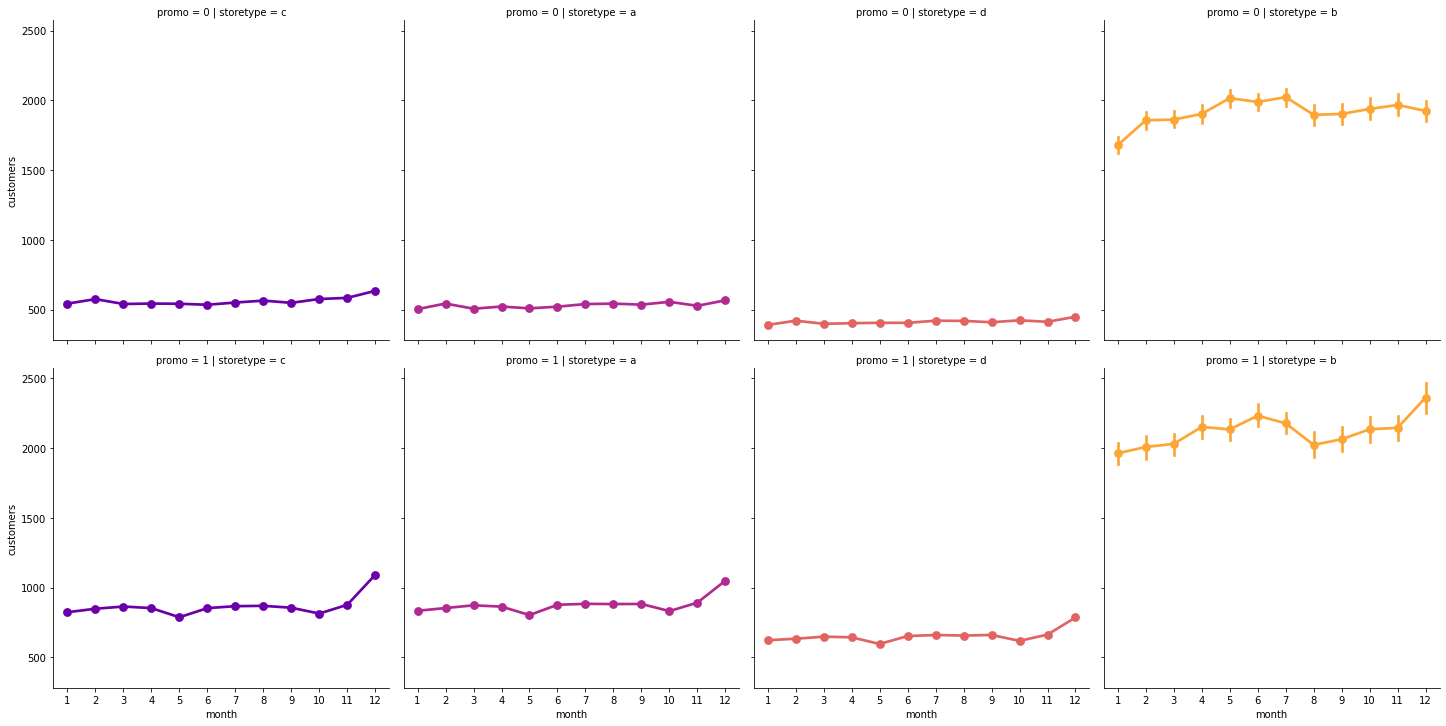

In [24]:
# customers trends
sns.factorplot(data = df, x = 'month', y = "customers", 
               col = 'storetype',
               palette = 'plasma',
               hue = 'storetype',
               row = 'promo',
               ) 

Storetype B has the highest number of customers, with the largest variance. All storetypes show an increase of customers towards christmas. This trend is higher, if they have run a promo.

Same effect of a dip for storetypes a,c and d in customers towards easter can be also be seen here.

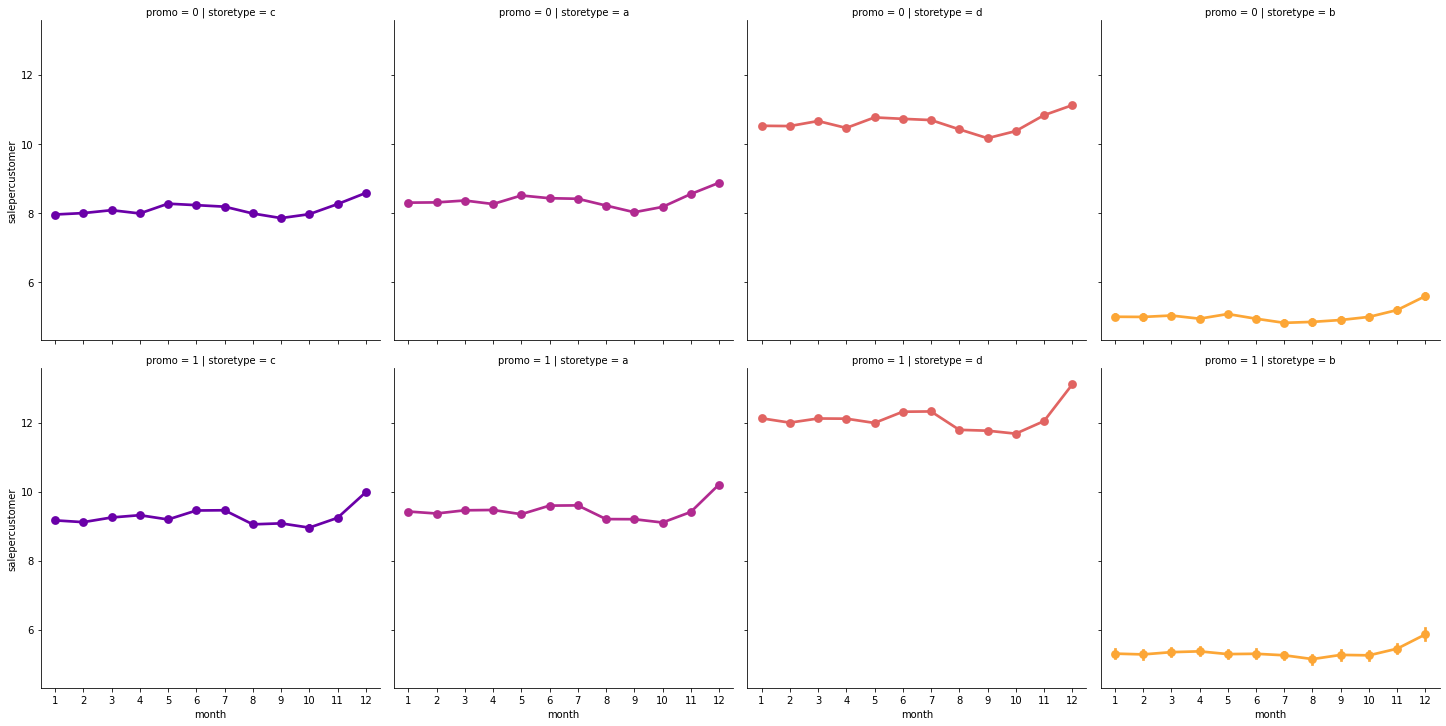

In [25]:
# sale per customer trends
df['salepercustomer'] = df['sales']/df['customers']
sns.factorplot(data = df, x = 'month', y = "salepercustomer", 
               col = 'storetype',
               palette = 'plasma',
               hue = 'storetype',
               row = 'promo', 
               ) 

Sales per customer:
storetype b seems to be where customers only buy small items in low numbers (possible trainstation location?)
storetype d customers buy the largest quantity
a und c are very similar

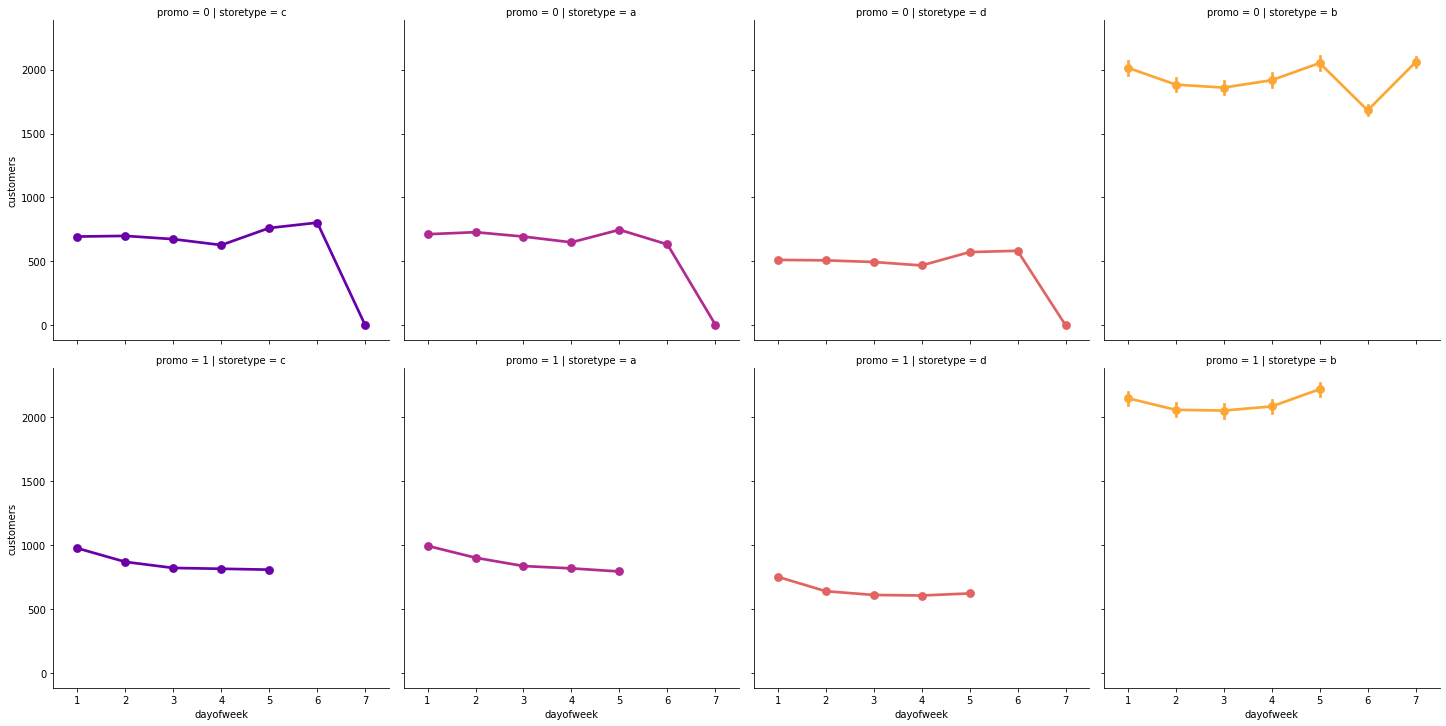

In [26]:
# weekday trends
sns.factorplot(data = df, x = 'dayofweek', y = "customers", 
               col = 'storetype',
               palette = 'plasma',
               hue = 'storetype',
               row = 'promo',
               ) 

Promos are run only during the work-week, no promo on saturday/sunday.

Storetype b also open on sundays -> trainstation, fo sho
storetyp a lower number of customers on saturday, c and d increased

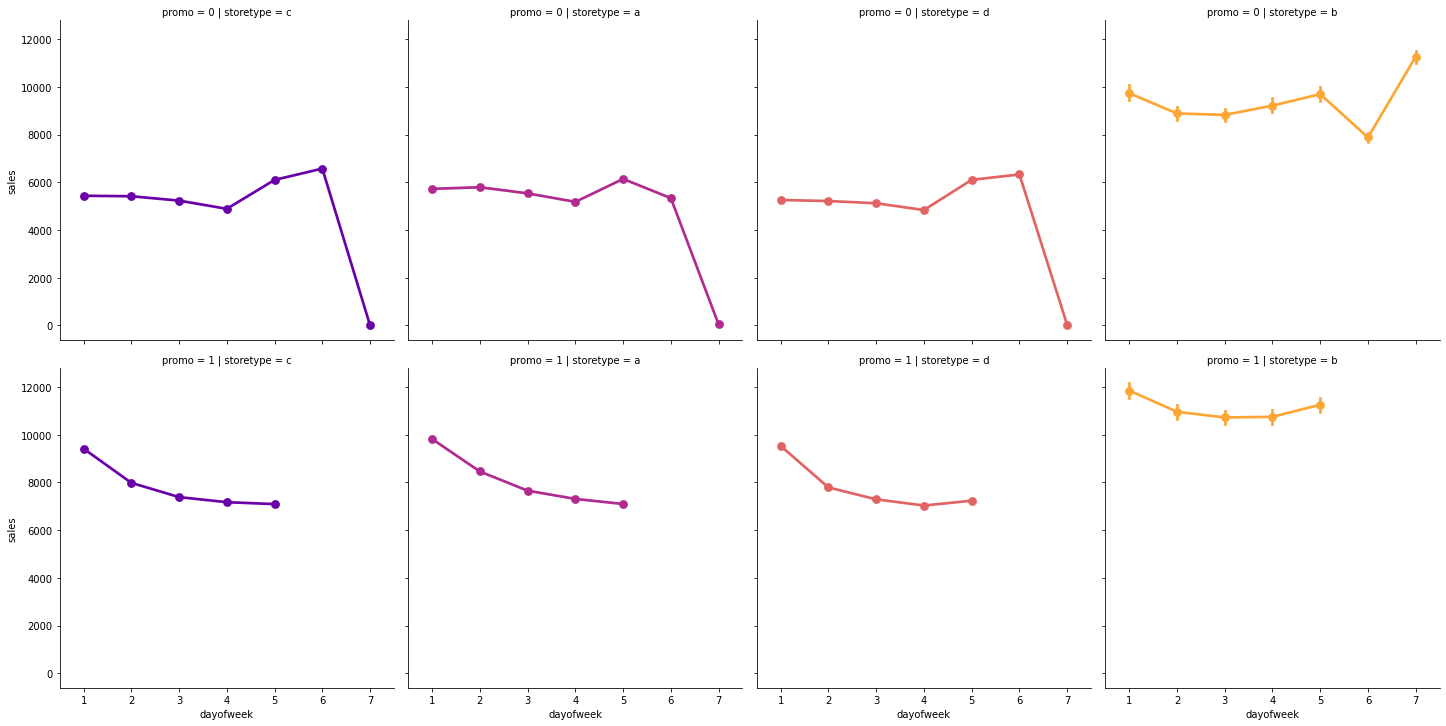

In [27]:
# weekday trends
sns.factorplot(data = df, x = 'dayofweek', y = "sales", 
               col = 'storetype',
               palette = 'plasma',
               hue = 'storetype',
               row = 'promo',
               ) 

In [28]:
df.head()

,store,dayofweek,date,sales,customers,open,promo,stateholiday,schoolholiday,storetype,...,promo2,promo2sinceweek,promo2sinceyear,promointerval,timestamp,year,month,day,dayofyear,salepercustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,0.0,0.0,0,2015-07-31,2015,7,31,212,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-31,2015,7,31,212,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015-07-31,2015,7,31,212,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0,0.0,0.0,0,2015-07-31,2015,7,31,212,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0,0.0,0.0,0,2015-07-31,2015,7,31,212,8.626118


Similar trends regarding sales numbers and customers.
Highest number of sales and customers on mondays, if a promo was run

In [29]:
df.columns

Index(['store', 'dayofweek', 'date', 'sales', 'customers', 'open', 'promo',
       'stateholiday', 'schoolholiday', 'storetype', 'assortment',
       'competitiondistance', 'competitionopensincemonth',
       'competitionopensinceyear', 'promo2', 'promo2sinceweek',
       'promo2sinceyear', 'promointerval', 'timestamp', 'year', 'month', 'day',
       'dayofyear', 'salepercustomer'],
      dtype='object')

In [ ]:
fig = px.bar(df, x='assortment', y='sales')